In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

Using TensorFlow backend.


In [37]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [33]:
import matplotlib.pyplot as plt

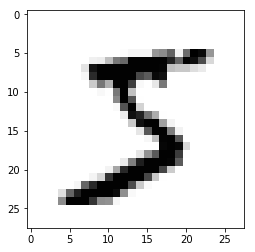

In [34]:
plt.imshow(xTrain[0], cmap='Greys')
plt.show()

In [35]:
# 수치데이터 확인
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t" %i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [38]:
xTrain=xTrain.reshape(xTrain.shape[0],784)
xTrain=xTrain.astype('float64') # 32와 64는 정밀도 차이
xTrain=xTrain/255
xTest=xTest.reshape(xTest.shape[0],784).astype('float64')/255

In [39]:
print(yTrain[0])

5


In [40]:
yTrain=np_utils.to_categorical(yTrain,10)
yTest=np_utils.to_categorical(yTest,10)

In [9]:
yTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
import os

In [11]:
# 모델 구성
model=Sequential()
model.add(Dense(512,input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
# 모델 환경설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 최적화
modelDir='./myModel/'
# 만약 myModel 디렉토리가 이미 존재하지 않는 다면
if not os.path.exists(modelDir):
    modelPath='./myModel/{epoch:02d}-{val_loss:.4f}.hdf5'
    os.makedirs(modelDir) # 경로 지정
    
# ModelCheckpoint 콜백 함수 :  keras에서 모델을 학습할떄마다 중간중간 callback 형태로 알려 줌
# save_best_only : 모델읮 ㅓㅇ확도가 최고값을 갱신했을때만 저장
checkpointer=ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
es=EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 모델 생성
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest), epochs=30, batch_size=200, callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0669 - val_accuracy: 0.9835

Epoch 00001: val_loss did not improve from 0.05861
Epoch 2/30
60000/60000 [==============================] - 3s 47us/step - loss: 5.5713e-04 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9841

Epoch 00002: val_loss did not improve from 0.05861
Epoch 3/30
60000/60000 [==============================] - 3s 47us/step - loss: 4.2968e-04 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9843

Epoch 00003: val_loss did not improve from 0.05861
Epoch 4/30
60000/60000 [==============================] - 3s 46us/step - loss: 3.6238e-04 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9839

Epoch 00004: val_loss did not improve from 0.05861
Epoch 5/30
60000/60000 [==============================] - 3s 47us/step - loss: 3.1122e-04 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy

In [19]:
print("테스트 정확도 : %.4f" %(model.evaluate(xTest, yTest)[1]))

10000/10000 [==============================] - 0s 40us/step
테스트 정확도 : 0.9802


In [20]:
yVloss=history.history['val_loss'] # 테스트 셋의 오차
yLoss=history.history['loss'] # 학습 셋의 오차

<function matplotlib.pyplot.show(*args, **kw)>

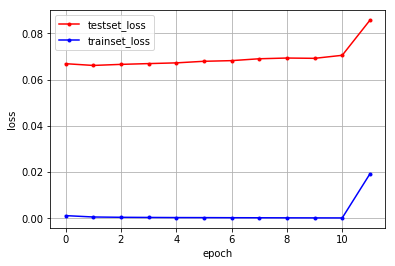

In [23]:
xLen=np.arange(len(yLoss))
plt.plot(xLen,yVloss,marker='.',c='red',label='testset_loss')
plt.plot(xLen,yLoss,marker='.',c='blue',label='trainset_loss')
plt.legend() # 범례 추가
plt.grid() # 격자 추가
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

In [26]:
# CNN으로 MNIST 모델 만들기
from keras.layers import *

In [27]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
# Conv2D(필터개수, kernel_size=(?,?), (행,열,색상), 활성화함수)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) # dropout할 비율을 줘야 함
model.add(Flatten())
# Flatten() : 1차원으로 변경하는 함수
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# 모델 최적화
modelDir='./myCnnModel/'
# 만약 myModel 디렉토리가 이미 존재하지 않는 다면
if not os.path.exists(modelDir):
    modelPath='./myModel/{epoch:02d}-{val_loss:.4f}.hdf5'
    os.makedirs(modelDir) # 경로 지정
    
# ModelCheckpoint 콜백 함수 :  keras에서 모델을 학습할떄마다 중간중간 callback 형태로 알려 줌
# save_best_only : 모델읮 ㅓㅇ확도가 최고값을 갱신했을때만 저장
checkpointer=ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
es=EarlyStopping(monitor='val_loss', patience=10)

In [46]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
xTrain=xTrain.reshape(xTrain.shape[0],28,28,1).astype("float32")/255
xTest=xTest.reshape(xTest.shape[0],28,28,1).astype("float32")/255
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [47]:
# 모델 생성
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest), epochs=30, batch_size=200, callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2856 - accuracy: 0.9138 - val_loss: 0.0555 - val_accuracy: 0.9813

Epoch 00001: val_loss improved from inf to 0.05552, saving model to ./myModel/01-0.0555.hdf5
Epoch 2/30
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0928 - accuracy: 0.9720 - val_loss: 0.0398 - val_accuracy: 0.9867

Epoch 00002: val_loss improved from 0.05552 to 0.03980, saving model to ./myModel/02-0.0398.hdf5
Epoch 3/30
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.0308 - val_accuracy: 0.9897

Epoch 00003: val_loss improved from 0.03980 to 0.03084, saving model to ./myModel/03-0.0308.hdf5
Epoch 4/30
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0309 - val_accuracy: 0.9892

Epoch 00004: val_loss did not improve from 0.03084
Epoch 5/30
60000/600

In [ ]:
# model.save("파일명.h5")
# from keras.models import load_model
# model=load_model("모델파일명.h5")
# model.summary() # 모델 구조 출력
# 분류 결과=model.predict_classes(테스트 데이터)

In [ ]:
# 예측이 틀린 이미지를 8개 출력
# label:9, pred:4....         label:1, pred:3....
# 9 이미지 출력                1 이미지 출력
# 2*4 형태로 틀링 ㄴ예측 결과 출력

In [48]:
len(xTest)

10000

In [49]:
idx=np.random.choice(xTest.shape[0],10000)
xHat=xTest[idx]
yHat=model.predict_classes(xHat)

In [50]:
cnt=0
ans=[]
pred=[]
for i in range(10000):
    if xHat[i]!==yHat[i]:
        ans.append(xHat[i])
        pred.append(yHat[i])
        cnt+=1
    if cnt==8:
        

array([2, 2, 1, ..., 2, 4, 6], dtype=int64)

In [51]:
# 이터레이터, 제너레이터
# iterator : 값을 차례대로 꺼낼 수 있는 객체
# for i in range(100):
# 0~99까지 값을 차례대로 꺼낼 수 있는 이터레이터 객체 생성

In [58]:
# iterable(반복가능객체, 문자열, 딕셔너리, 리스트...)
# 객체가 iter메서드를 포함 여부 : 객체가 반복 가능한지 확인
dir([1,2,3]) # __iter__
it=[1,2,3].__iter__()
it.__next__()
it.__next__()
it.__next__()
it.__next__()

StopIteration: 

In [61]:
"hello".__iter__()
{'a':1,'b':2}.__iter__()
{1,2,3}.__iter__()

In [64]:
for i in range(3):
    print(i)

# 1. range에서 __iter__로 iterator 객체 생성
# 2. 반복할떄마다 이터레이터에서 __next__를 호출해서 숫자를 꺼내서 i에 저장

0
1
2


In [65]:
# 내가 만든 클래스에 __iter__, __next__
# 두 메서드를 구현하면, 이터레이터 생성 가능

In [77]:
class MyCounter:
    
    def __getitem__(self,index):
        if index<self.stop:
            return index
        else:
            raise StopIteration
    
    def __init__(self,stop):
        self.current=0
        self.stop=stop  
        
#     def __iter__(self):
#         return self
    
#     def __next__(self):
#         if self.current < self.stop:
#             r=self.current
#             self.current+=1
#             return r
#         else:
#             raise StopIteration
        
for i in MyCounter(5):
    print(i) # 0 1 2 3 4 5

0
1
2
3
4


In [80]:
# MyCounter(3)[0]
for i in MyCounter(3):
    print(i)

0
1
2


In [70]:
a,b,c=MyCounter(3)
print(a,b,c)

0 1 2


In [74]:
a,b,c=map(int,input().split())

1 2 3


In [81]:
# 파이썬 iter 함수 : 객체의 __iter__ 메서드를 호출
# 파이썬 next 함수 : 객체의 __next__ 메서드를 호출 -> 다음값을 갖고 옴

In [83]:
it=iter(range(3))
it.__next__()

0

In [88]:
# iter(객체, 반복을 끝낼값)
import random
it=iter(lambda: random.randint(0,5),2)
next(it)
next(it)
next(it)

StopIteration: 

In [89]:
# 제너레이터 : 이터레이터를 생성하는 함수
# 함수 내부에 yield 키워드를 주면 이터레이터가 생성됨
def myGen():
    yield 0
    yield 1
    yield 2

In [90]:
for i in myGen():
    print(i)

0
1
2


In [92]:
mg=myGen()
dir(mg)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [93]:
# image 증식
# 1. 이미지 제너레이터 클래스 객체 생성
# 2. flow_from_directory() 호출 -> 제너레이터 생성

In [94]:
from keras.preprocessing.image import ImageDataGenerator

In [106]:
trainDataGen=ImageDataGenerator(rescale=1./255)
trainGenerator=trainDataGen.flow_from_directory(
    'C:/Users/student/Downloads/데이터들/do/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [107]:
testDataGen=ImageDataGenerator(rescale=1./255)
testGenerator=testDataGen.flow_from_directory(
    'C:/Users/student/Downloads/데이터들/do/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [108]:
# 크기(24,24), 채널:3(컬러), 필터:3*3, 필터개수:32, 활성함수:relu
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu', input_shape=(24,24,3)))

# 필터 : 3*3, 필터개수:64, relu
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
# maxpool :2*2
model.add(MaxPooling2D(pool_size=(2,2)))
# 플래튼 -> Dense(128개 뉴런 출력) -> dense(softmax)
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
# fit_generator : 제너레이터로 생성된 데이터 학습
model.fit_generator(
    # 훈련데이터 제너레이터
    trainGenerator,
    steps_per_epoch=15, # 총 45 image, 3개의 class => 45/3
    epochs=50,
    validation_data=testGenerator,
    validation_steps=5    
)

Epoch 1/50
15/15 [==============================] - 1s 37ms/step - loss: 0.8264 - accuracy: 0.6444 - val_loss: 0.1675 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0479e-04 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 1.4198e-04 - accuracy: 1.0000 - val_loss: 5.2331e-05 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 18ms/step - loss: 1.0435e-04 - accuracy: 1.0000 - val_loss: 7.9945e-05 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 7.5958e-05 - accuracy: 1.0000 - val_loss: 1.0922e-04 - val_ac

In [112]:
scores=model.evaluate_generator(testGenerator,steps=5)
print(scores)

[9.695550033939071e-06, 1.0]


In [113]:
res=model.predict_generator(testGenerator,steps=5)
print(res)

[[9.99999881e-01 1.18895848e-07 8.59899085e-09]
 [9.99996901e-01 1.51310553e-06 1.52648613e-06]
 [8.95512784e-08 4.11781919e-04 9.99588192e-01]
 [9.99999642e-01 1.91071038e-07 1.34582791e-07]
 [5.00151254e-09 1.52907617e-07 9.99999881e-01]
 [9.82444346e-01 5.24014213e-05 1.75033100e-02]
 [1.20311261e-10 3.54080697e-07 9.99999642e-01]
 [8.25658276e-07 9.99999046e-01 1.01434331e-07]
 [1.60267074e-02 8.18427444e-01 1.65545911e-01]
 [4.31476543e-09 1.00000000e+00 3.55440521e-09]
 [3.83370548e-07 9.99999523e-01 1.39985715e-07]
 [6.14145179e-08 9.99999881e-01 3.10999670e-09]
 [3.56277841e-10 1.04768532e-07 9.99999881e-01]
 [9.99999881e-01 1.14194016e-07 2.85441750e-08]
 [2.47079979e-09 2.87961975e-05 9.99971151e-01]]


In [ ]:
"""
rotation_range : 회전, 90~0도 사이 랜덤)
width_shift_range : 0~1사이의 비율, 0.1(이미지 너비의 10% 만큼 좌우로 이동) 이미지가 짤려도 이동함
width_shift_range : 0~1사이의 비율, 0.1(이미지 높이의 10% 만큼 상하로 이동) 이미지가 짤려도 이동함
shear_range : 변형, 라디안, 0.5(반시계방향 밀어서 변형)
zoom_range : 축소, 0.3(0.7~1.3 사이의 크기로 랜덤하게 확대 또는 축소)
horizontal_flip : 수평축으로 뒤집기
vertical_flip : 수직축으로 뒤집기

"""

In [114]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [115]:
augGen=ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.5,
                  zoom_range=[0.8,2.0],
                  horizontal_flip=True,
                  vertical_flip=True,
                  fill_mode='nearest')

In [116]:
img=load_img('C:/Users/student/Downloads/데이터들/do/train/triangle/triangle001.png')

In [117]:
img

In [120]:
x=img_to_array(img)
x.shape
x=x.reshape((1,)+x.shape)
x.shape

(1, 24, 24, 3)

In [122]:
i=0
for batch in augGen.flow(x,batch_size=1, save_to_dir='C:/Users/student/Downloads/데이터들/do/store',save_prefix='tri',
                        save_format='png'):
    i+=1
    if i>50:
        break